In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                  
import matplotlib.pyplot as plt

#machine learning from lightgbm import LGBMClassfier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [4]:
#lets observe the shape of our data
print('train data shape :', train.shape)
print('train data shape :', test.shape)

train data shape : (23524, 13)
train data shape : (10086, 12)


In [5]:
#show list of column in train data
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [6]:
#inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
#checking for missing value
# print('missing value', train.isnull())
print('missing value', train.isnull().sum())
# print('missing value', train.isnull().sum().sum())

missing value country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


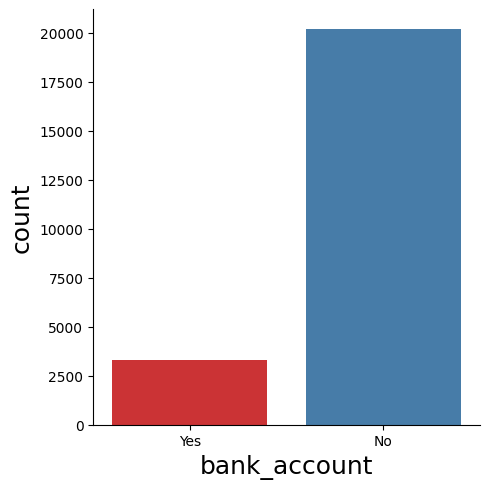

In [8]:
#explore Target Distribution
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")

In [9]:
#view the subbmision file
ss.head()
# ss.tail()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [10]:
#to show some information about data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [11]:
#lets view variables
# variables
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [12]:
#frequency table of a variablewill give us
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

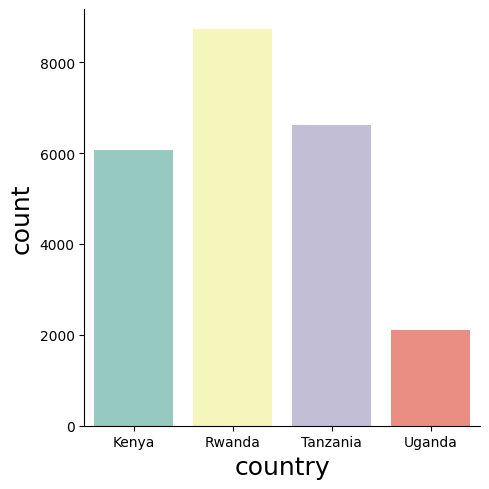

In [13]:
#explore Target Distribution for country
sns.catplot(x="country", kind="count", data=train, palette="Set3")

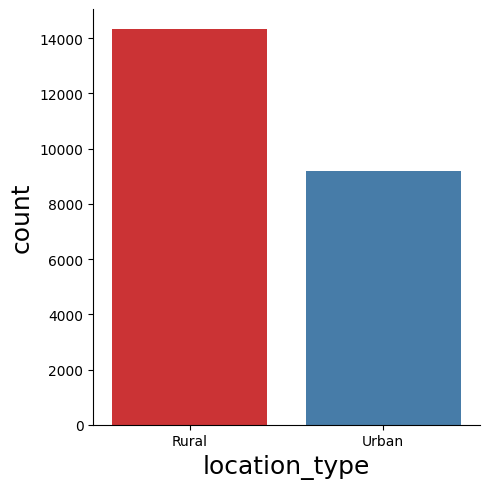

In [14]:
#explore Target Distribution
sns.catplot(x="location_type", kind="count", data=train, palette="Set1")

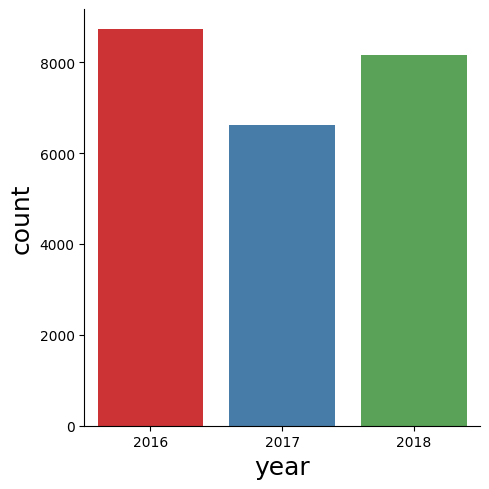

In [15]:
#explore Target Distribution
sns.catplot(x="year", kind="count", data=train, palette="Set1")

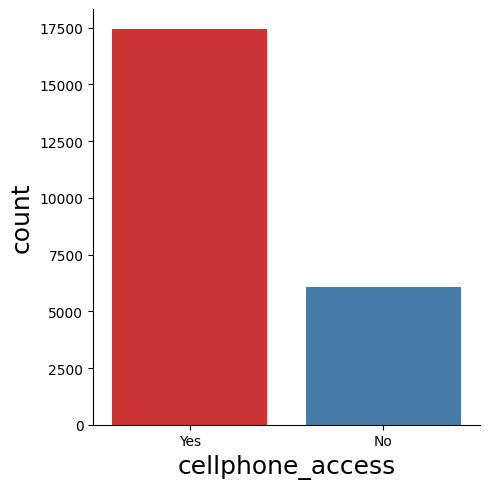

In [16]:
#explore Target Distribution
sns.catplot(x="cellphone_access", kind="count", data=train, palette="Set1")

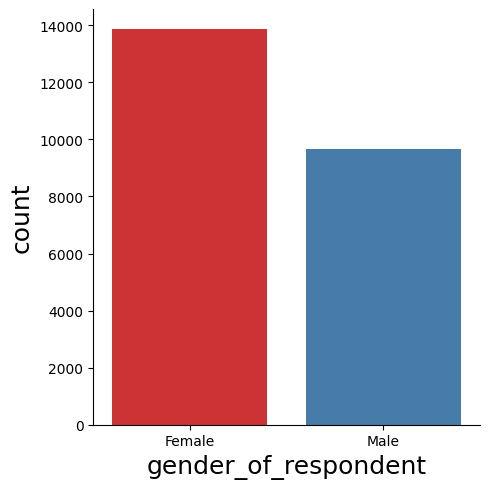

In [17]:
#explore Target Distribution
sns.catplot(x="gender_of_respondent", kind="count", data=train, palette="Set1")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

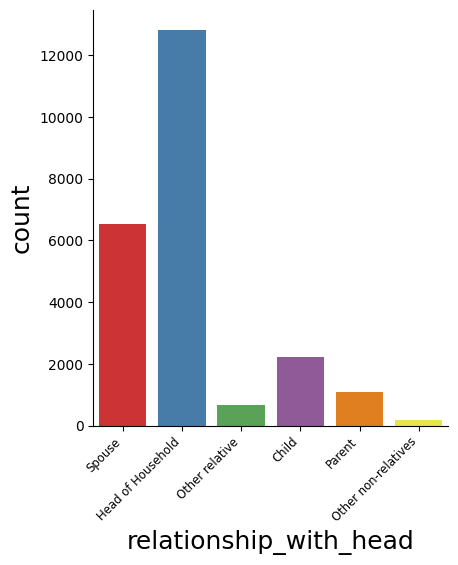

In [18]:
#explore Target Distribution
#plt.xticks used to rotate  the labelly
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="Set1")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    # fontsize='x-large'
    fontsize='small'
)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

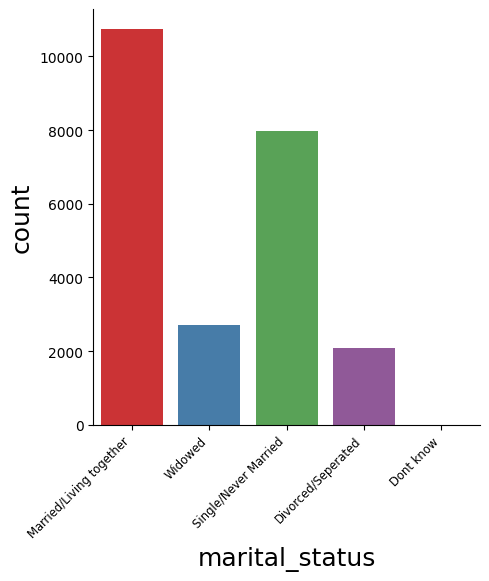

In [19]:
#explore Target Distribution
#plt.xticks used to rotate  the labelly
sns.catplot(x="marital_status", kind="count", data=train, palette="Set1")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    # fontsize='x-large'
    fontsize='small'
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

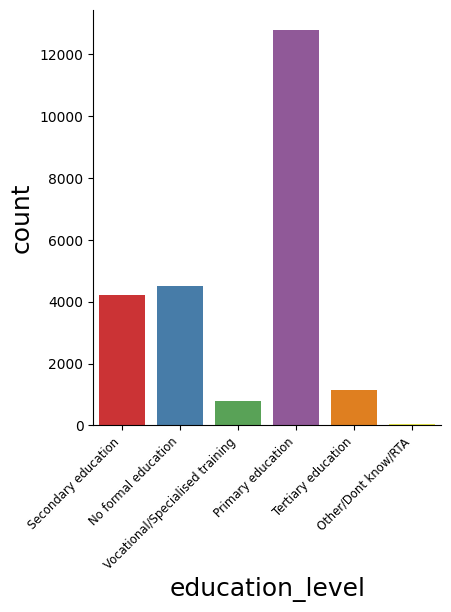

In [20]:
#explore Target Distribution
#plt.xticks used to rotate  the labelly
sns.catplot(x="education_level", kind="count", data=train, palette="Set1")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    # fontsize='x-large'
    fontsize='small'
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

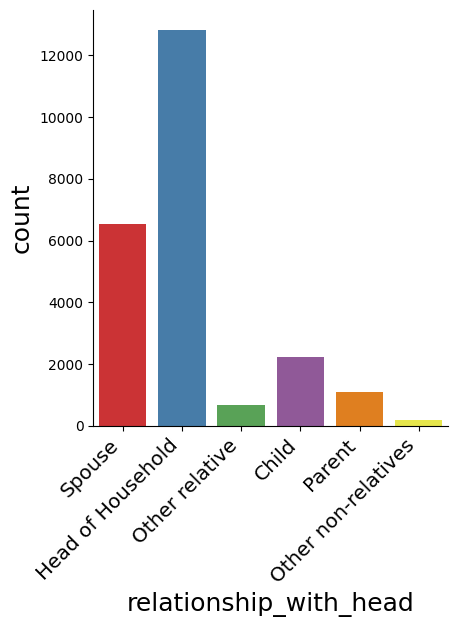

In [26]:
#explore Target Distribution
sns.catplot(x="relationship_with_head", kind="count", data=train, palette='Set1')
plt.xticks(
rotation=45,
horizontalalignment ='right',
fontweight='light',
fontsize = 'x-large'
)

Text(0, 0.5, 'number of people')

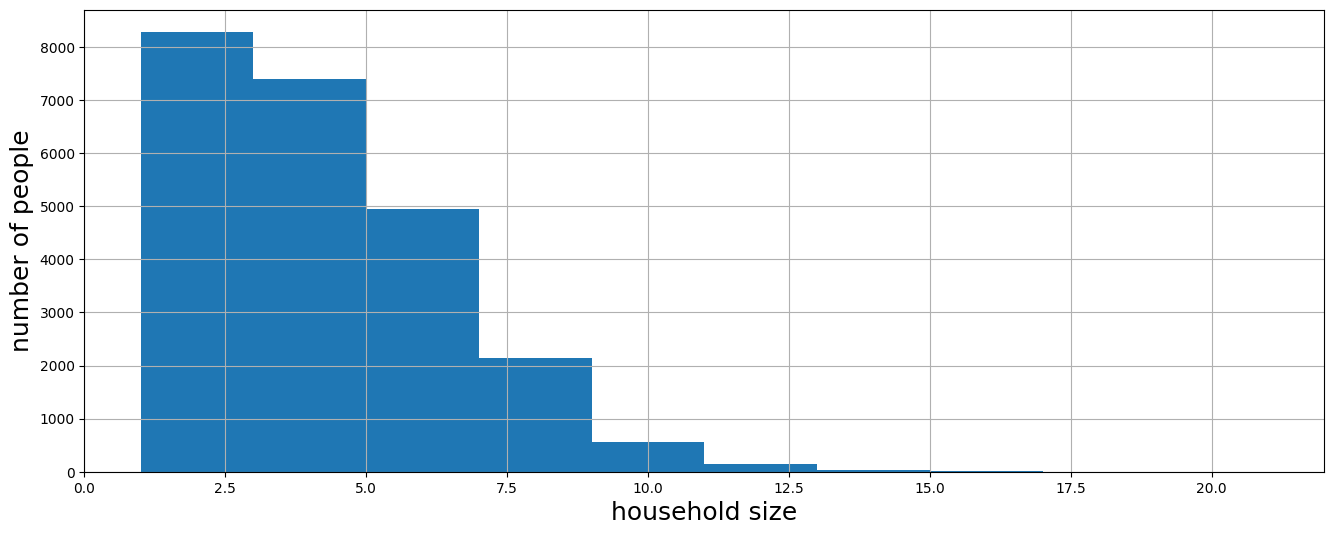

In [27]:
#explore house holder size distribution
plt.figure(figsize=(16, 6))
train.household_size.hist()
plt.xlabel('household size')
plt.ylabel('number of people')

([0, 1], [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x600 with 0 Axes>

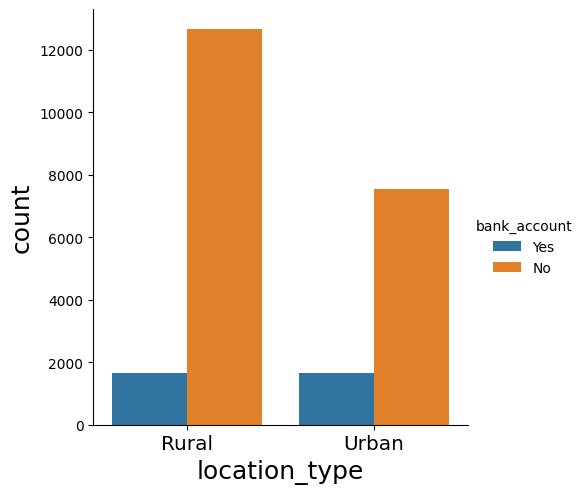

In [28]:
plt.figure(figsize=(16, 6))
sns.catplot(x='location_type', hue='bank_account',kind='count', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x600 with 0 Axes>

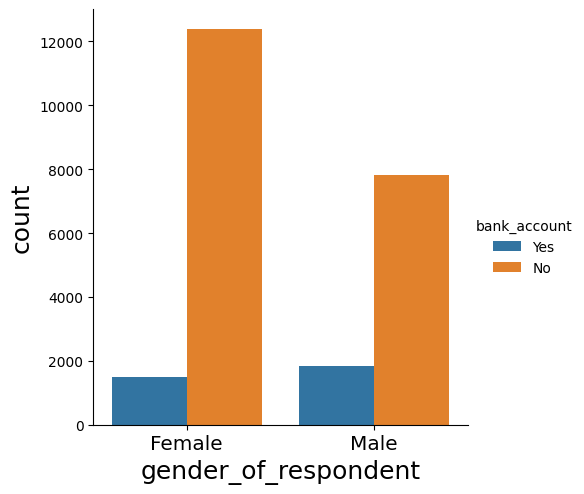

In [29]:
plt.figure(figsize=(16, 6))
sns.catplot(x='gender_of_respondent', hue='bank_account',kind='count', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x600 with 0 Axes>

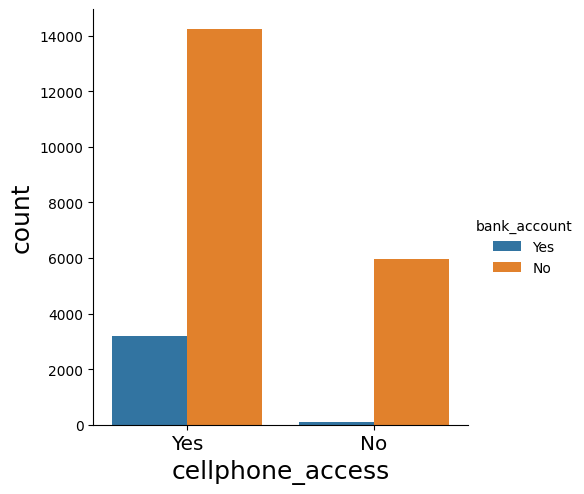

In [30]:
plt.figure(figsize=(16, 6))
sns.catplot(x='cellphone_access', hue='bank_account',kind='count', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

<Figure size 1600x600 with 0 Axes>

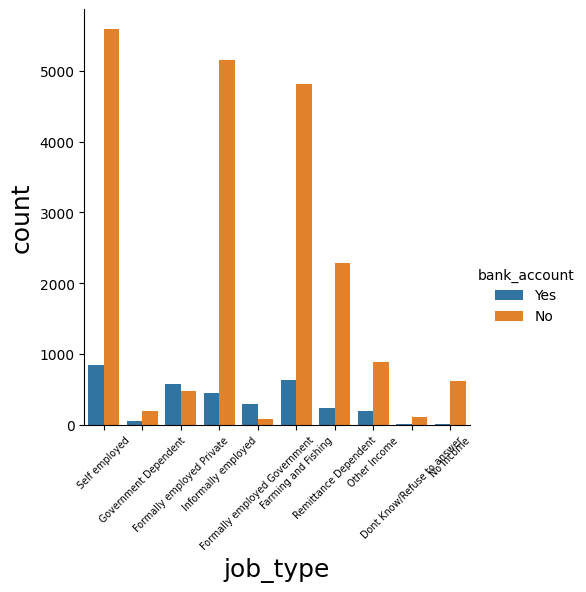

In [31]:
plt.figure(figsize=(16, 6))
sns.catplot(x='job_type', hue='bank_account',kind='count', data=train)
plt.xticks(
    rotation=45,
    fontweight='light',
    fontsize='x-small'
)

In [39]:
#importing processuing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#convrt target label to numerical data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])


#separate training features from target
x_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [33]:
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [34]:
print(x_train)

      country  year       uniqueid location_type cellphone_access  \
0       Kenya  2018     uniqueid_1         Rural              Yes   
1       Kenya  2018     uniqueid_2         Rural               No   
2       Kenya  2018     uniqueid_3         Urban              Yes   
3       Kenya  2018     uniqueid_4         Rural              Yes   
4       Kenya  2018     uniqueid_5         Urban               No   
...       ...   ...            ...           ...              ...   
23519  Uganda  2018  uniqueid_2113         Rural              Yes   
23520  Uganda  2018  uniqueid_2114         Rural              Yes   
23521  Uganda  2018  uniqueid_2115         Rural              Yes   
23522  Uganda  2018  uniqueid_2116         Urban              Yes   
23523  Uganda  2018  uniqueid_2117         Rural              Yes   

       household_size  age_of_respondent gender_of_respondent  \
0                   3                 24               Female   
1                   5                 70 

In [37]:
#function to preprocess our data from train model
def preprocessing_data(data):
    #cnvert numerical into float
    float_array = data[["household_size","age_of_respondent","year"]].values.astype(float)
    #categorical features into one hot encodng
    categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]
    #One hot encoding convention(are used mauintaion high prediction)
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    #Label Encoder convension(conveert categrical int numerical data)
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    #drop unique id column
    data = data.drop(["uniqueid"], axis=1)
    #scale our data in range of 0 and 1
    #MinMaxScaler technique used to scale numerical features in a specific range ,0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [44]:
#importing processuing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#convrt target label to numerical data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])


#separate training features from target
x_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [46]:
# preprocess the train data 
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)

In [47]:
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)
# the first train row
print(processed_train[:3])

[[1.         0.         1.         0.1        0.0952381  0.
  0.         0.         0.         0.         0.         1.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         1.         0.         0.
  0.        ]
 [1.         0.         0.         0.2        0.64285714 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]
 [1.         1.         1.         0.2        0.11904762 1.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.        

In [40]:
import sklearn.model_selection

In [49]:
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)
#split train data
from sklearn.model_selection import train_test_split

x_Train, x_Val, y_Train, y_Val = train_test_split(processed_train, y_train, stratify = y_train, test_size = 28, random_state=42)

In [50]:
#importing classfier algorithim
from xgboost import XGBClassifier

#crate model
xg_model = XGBClassifier()
#fitting the model
xg_model.fit(x_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
#importing evaluation metrices
from sklearn.metrics import confusion_matrix, accuracy_score

#evaluate the model
xg_y_model = xg_model.predict(x_Val)

acc_score = accuracy_score(y_Val, xg_y_model)
# print('Accurscy is = ', acc_score*100)
print('Accurscy is = ', acc_score)

#get error rate
# print("Error rate of XGB Classfier: ", (1 - accuracy_score(y_Val, xg_y_model))*100)
print("Error rate of XGB Classfier: ", 1 - accuracy_score(y_Val, xg_y_model))

Accurscy is =  0.9285714285714286
Error rate of XGB Classfier:  0.0714285714285714


In [53]:
#print the classification report 
from sklearn.metrics import classification_report

report = classification_report(y_Val, xg_y_model)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28



Error rate for XGBClassfier model is: 0.0714285714285714
Confusion Matrix
[[1.  0. ]
 [0.5 0.5]]


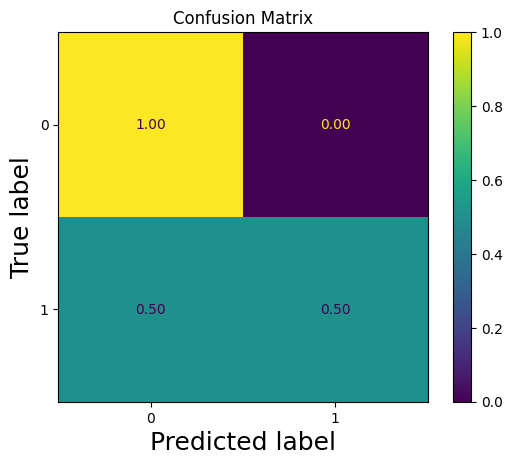

In [54]:
#calculate accuracy and prediction of model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

xgboost_model_predicted = xg_model.predict(x_Val)
score = accuracy_score(y_Val, xgboost_model_predicted)
print("Error rate for XGBClassfier model is:", 1 - score)

#calculate confusion matrix
cm = confusion_matrix(y_Val, xgboost_model_predicted, normalize='true')
print("Confusion Matrix")
print(cm)

##plot confusion matrix as aheatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_Val))
disp.plot(cmap='viridis', values_format='.2f')
plt.title("Confusion Matrix")
plt.show()

True Positive (TP): The number of positive instances correctly predicted as positive.(1,1)
True Negative (TN): The number of negative instances correctly predicted as negative.(0,0)
False Positive (FP): The number of negative instances incorrectly predicted as positive (Type I error).(1,0)
False Negative (FN): The number of positive instances incorrectly predicted as negative (Type II error).(0,1)

In [55]:
#get predicted result for the test data
test.bank_account = xg_model.predict(processed_test)

In [56]:
#create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + "x" + test["country"], "bank_account": test.bank_account})

In [57]:
#show the five sample
submission.sample(15)

,uniqueid,bank_account
6815,uniqueid_7090xTanzania,0
4994,uniqueid_11129xRwanda,0
1234,uniqueid_7303xKenya,0
8298,uniqueid_8573xTanzania,0
3827,uniqueid_9962xRwanda,0
7994,uniqueid_8269xTanzania,0
347,uniqueid_6416xKenya,0
1311,uniqueid_7380xKenya,0
3225,uniqueid_9360xRwanda,0
4049,uniqueid_10184xRwanda,0


In [60]:
#create a submission file in jupyter notebook and download it
from IPython.display import FileLink
submission.to_csv('submission1.csv', index=False)


In [61]:
#display a dowload link
FileLink('submission1.csv')

/home/mwampulule/Documents/zindi/financial-inclusion-in-africa/submission1.csv

In [62]:
#in case of exel file
from IPython.display import FileLink
submission.to_csv('submission2.xlsx', index=False)

In [63]:
#display a dowload link
FileLink('submission2.xlsx')

/home/mwampulule/Documents/zindi/financial-inclusion-in-africa/submission2.xlsx